## Gradient Descent and Backpropagation maths explained in short through this image.

![Gradient descent image](https://media.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

In [663]:
import torch
from torch import nn # neural network
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.0.1+cpu'

In [664]:
# Data, preparing and loading
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [665]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [666]:
# Creating a training and test set
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [667]:
# Visualize data
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):


    plt.figure(figsize=(5,3))

    plt.scatter(train_data, train_label, c='b', s=4, label = 'Training data')
    plt.scatter(test_data, test_label, c='g', s=4, label = 'Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop={'size':14})

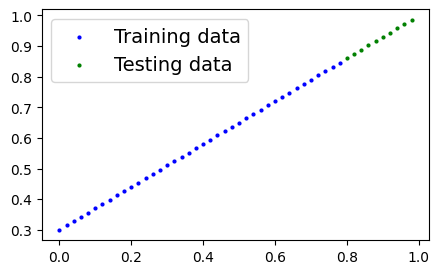

In [668]:
plot_predictions()

In [669]:
# Building model
# Creating linear regression model class

class LinearRegressionModel(nn.Module):

    # nn.Module is inherited to implement neural networks

    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self,x:torch.Tensor) ->torch.Tensor:
        return self.weight * x +self.bias

### PyTorch model building essentials
* torch.nn - contains all the buildings for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn
* torch.nn.Module - the base class for all neural network modules
* torch.optim - this is where teh optimizers in PyTorch live

In [670]:
# Random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Instance of our model class
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [671]:
# Named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [672]:
# Testing the model without training

with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

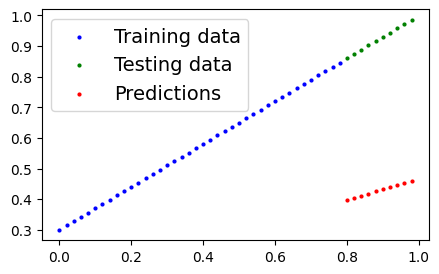

In [673]:
plot_predictions(predictions=y_pred)

In [674]:
# Setting up loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [675]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [676]:
# Building a training loop and testing loop

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch : {epoch}, loss : {loss}, test loss : {test_loss}")
        print(model_0.state_dict())

Epoch : 0, loss : 0.31288138031959534, test loss : 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10, loss : 0.1976713240146637, test loss : 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20, loss : 0.08908725529909134, test loss : 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30, loss : 0.053148526698350906, test loss : 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40, loss : 0.04543796554207802, test loss : 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50, loss : 0.04167863354086876, test loss : 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60, loss : 0.03818932920694351, test loss : 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788

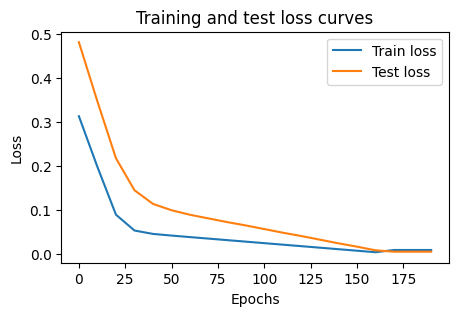

In [677]:
plt.figure(figsize=(5,3))
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [678]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

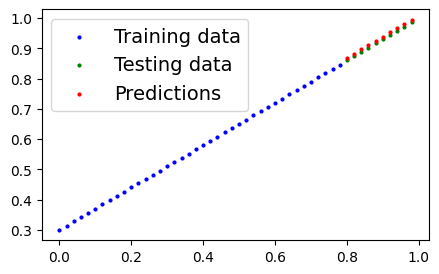

In [679]:
plot_predictions(predictions=y_pred_new)

In [682]:
# Saving a model
from pathlib import Path
model_path = Path("Models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = 'workflowPyTorch_model_0.pth'
model_save_path = model_path/model_name

print(f"Saving model to : {model_save_path}, model : {model_0.state_dict()}")
torch.save(obj=model_0.state_dict(), f=model_save_path)

Saving model to : Models\workflowPyTorch_model_0.pth, model : OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
